## Минипроект по статистике 1
## Statistics Miniproject 1

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
games=pd.read_csv('~/games.csv')

In [207]:
print('There are {} rows and {} columns\n'.format(games.shape[0],games.shape[1]))
print('With the following datatypes: \n')
print(games.dtypes)

There are 16598 rows and 11 columns

With the following datatypes: 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [208]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [209]:
games=games.dropna()

In [210]:
games['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

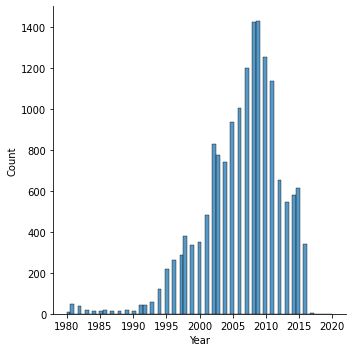

In [211]:
sns.displot(games['Year'], kde=False)

In [212]:
games.groupby(['Year']).count().sort_values('Rank', ascending=False).head(3)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2009.0,1431,1431,1431,1431,1431,1431,1431,1431,1431,1431
2008.0,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428
2010.0,1257,1257,1257,1257,1257,1257,1257,1257,1257,1257


In [213]:
grouped_by_platform=games.groupby(['Platform'], as_index=False).count()
grouped_by_platform['Total']=grouped_by_platform['Rank'].sum()
grouped_by_platform['Share']=round(grouped_by_platform['Rank']/grouped_by_platform['Total'],2)
grouped_by_platform_top=grouped_by_platform[grouped_by_platform['Share']>=0.07]. \
                        sort_values('Rank',ascending=False)['Platform'].to_list()

In [214]:
print(grouped_by_platform_top)

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']


In [215]:
games.groupby(['Publisher'],as_index=False).count(). \
                                sort_values('Rank', ascending=False).head(5)

,Publisher,Rank,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
138,Electronic Arts,1339,1339,1339,1339,1339,1339,1339,1339,1339,1339
21,Activision,966,966,966,966,966,966,966,966,966,966
347,Namco Bandai Games,928,928,928,928,928,928,928,928,928,928
524,Ubisoft,918,918,918,918,918,918,918,918,918,918
275,Konami Digital Entertainment,823,823,823,823,823,823,823,823,823,823


In [216]:
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [217]:
nintendo_games=games.query('Publisher=="Nintendo"')
NA_Sales=pd.DataFrame(nintendo_games['NA_Sales'].describe())
EU_Sales=pd.DataFrame(nintendo_games['EU_Sales'].describe())
JP_Sales=pd.DataFrame(nintendo_games['JP_Sales'].describe())
Other_Sales=pd.DataFrame(nintendo_games['Other_Sales'].describe())
nintendo_summary=pd.concat([NA_Sales, EU_Sales,JP_Sales, Other_Sales],axis=1)
nintendo_summary

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

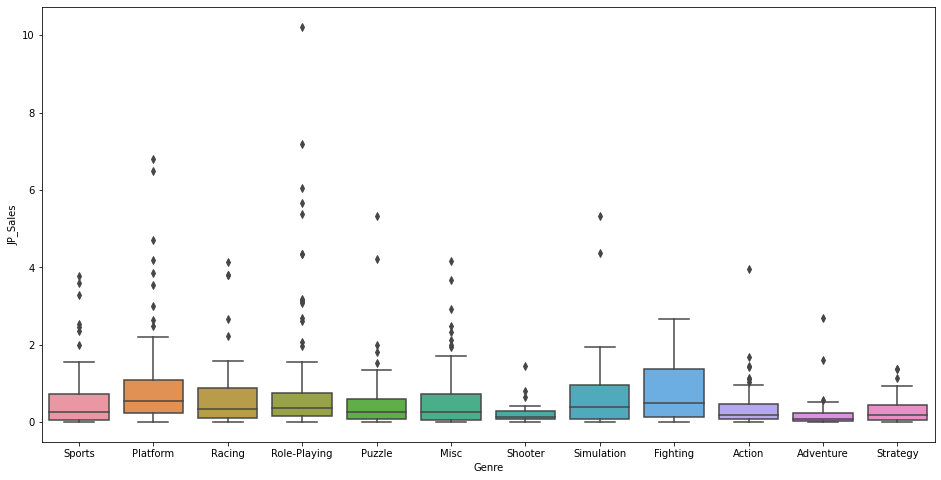

In [218]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Genre',y='JP_Sales', data=nintendo_games)

In [219]:
nintendo_games=nintendo_games.query('Genre=="Fighting" | Genre=="Simulation" | Genre=="Platform"| Genre=="Racing" | Genre=="Sports"')

In [220]:
nintendo_games_by_genre=nintendo_games.groupby(['Genre','Year'],as_index=False).sum()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

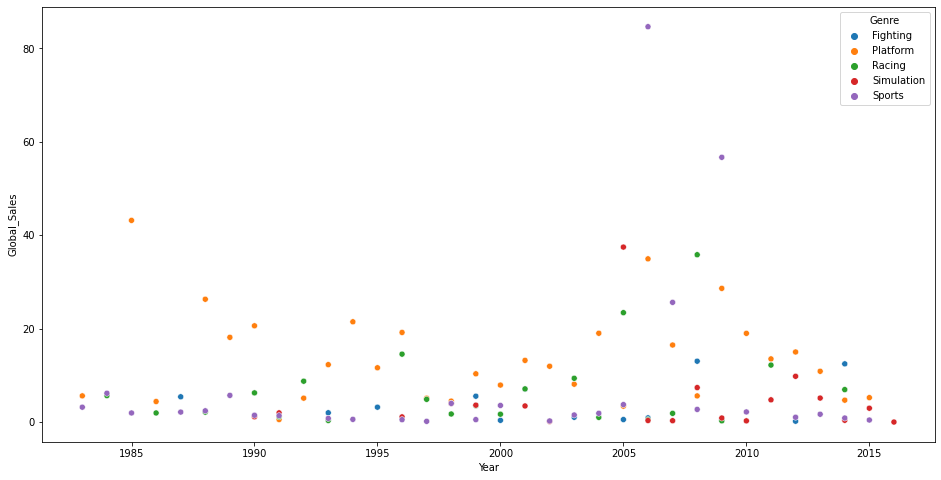

In [221]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Year',y='Global_Sales', data=nintendo_games_by_genre, hue='Genre')